# EDA US Census
### Antonio Montilla
### date: 22 - 11 - 2019

Basado en la última práctica EDA Titanic en Python (el fichero original se encuentra en Google Drive), deben realizar una EDA completo para este dataset:

https://archive.ics.uci.edu/ml/datasets/adult

**IMPORTANTE**:
Los pasos a realizar son:
- exploración
- limpieza
- discretización
- creación nuevos atributos
- visualización con los gráficos de ggplot2 de las variables que consideran importantes
- conclusiones justificadas sobre vuestra observaciones
- posibilidad de agregar nuevos escenarios posibles (nuevas fuentes de datos, tipo de ingestas,
otros aspectos de análisis, etc.)
- Intentar crear el output de salida en formato HTML (buscar info de knit y sus dependencias)

In [30]:
#0) Importando librerias a utilizar
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import io
import requests

In [6]:
#1) Importando database
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
s = requests.get(url).content
df_datosAdu = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [9]:
#2) Agregando etiquetas a columnas
df_datosAdu.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hour-per-week","native-country","income"]

In [10]:
#3) Creando backup del database
df_datos_backup = df_datosAdu

In [11]:
#4) Exploración inicial del database
#Encabezado de los primeros 10 observaciones
df_datosAdu.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [12]:
#Buscamos las informaciones de ns dataset
df_datosAdu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education-num     32560 non-null int64
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hour-per-week     32560 non-null int64
native-country    32560 non-null object
income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Primeras observaciones:
* La database contiene 15 variables y 32.561 observaciones
* Las variables contienen información socieconómicas de individuos en USA, donde el ingreso anual (referencia $50k) se especifica en función al genero, raza, estado civil, educación, entre otros.
* Las siguientes variables son caracteres y (en principio) requerirán factorización: 'workclass', 'education', 'marital-status', 'married-civ-spouse', 'occupation', 'relationship', 'race', 'sex', 'native-country'

In [13]:
#Estadísticas básicas de columnas numéricas
df_datosAdu.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hour-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


* La columna _fnlwgt_ es un factor de ajuste estadistico (mediendo peso de la muestra) y por lo tanto no será usado en el EDA
* De igual manera _capital-gain_ y _capital-loss_ son columnas que continen variación de posición activos de activo que no serán usadas en el EDA

In [21]:
#Eliminando columnas que no se utilizaran en el análisis: _fnlwgt_, _capital-gain_ y _capital-loss_
df_datosAdu = df_datosAdu.drop(['fnlwgt', 'capital-gain', 'capital-loss'], axis=1)

#### Posibles preguntas a investigar en el EDA:
* El nivel educativo es un determinante del nivel de ingreso?
* La raza importa en el nivel de ingreso?
* Y el pais de origen?
* Las personas casadas tienden a tener menos ingresos?
* Realmente hay dicriminación de género en cuanto al ingreso en USA?
* Se observa una brecha de ingreso entre trabajadores del Estado vs. privados?
* Y en terminos de autónomos y empleados?

In [22]:
#5) Limpieza de los datos: Precensia de NAs
valores_na = df_datosAdu.isna().sum()
valores_na

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hour-per-week     0
native-country    0
income            0
dtype: int64

La exploración confirma no precensia de NAs en el df

In [23]:
#6) Limpieza de los datos: Precensia de missing values
valores_null = df_datosAdu.isnull().sum()
valores_null

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hour-per-week     0
native-country    0
income            0
dtype: int64

La exploración confirma no precensia de valores nulos en el df

In [25]:
#7) Discretrizando las variables
#Primer paso identificar columnas que podrian ser factorizadas (string que no contengan excesivos datos únicos)
pd.value_counts(df_datosAdu['workclass'])
#Segundo: factorizar variable por variable

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [26]:
#Creación de nuevos atributos
#Pais de procedencia
#A partir de 'native-country': nueva columna 'US_native' tomando 1 si individuo es originario de USA y 0 si no
df_datosAdu['US_native'] = np.where(df_datosAdu['native-country']==' United-States', 1, 0)

In [27]:
#Income
#A partir de _income_: nueva columna 'Income_50' que sea 1 si ingreso es '>50' o 0 si '<50' 
df_datosAdu['Income_50'] = np.where(df_datosAdu['income']==' >50K', 1, 0)

In [28]:
#Race
#A partir de _race_: nueva columna 'White' que toma 1 si race es blanco y 0 si no
df_datosAdu['White'] = np.where(df_datosAdu['race']==' White', 1, 0)

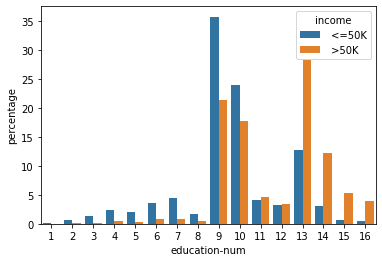

In [39]:
#8) Analisis conjunto de los datos
#8.1) El nivel educativo esta asociado con el nivel de ingreso?
edu_counts = (df_datosAdu.groupby(['income'])['education-num']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('education-num'))
p = sns.barplot(x="education-num", y="percentage", hue="income", data=edu_counts)

Hay una clara correlación positiva entre el número de años en educación con el nivel de ingreso, i.e. la probabilidad de que un individuo gane > $50k anuales crece en función a los años de estudio

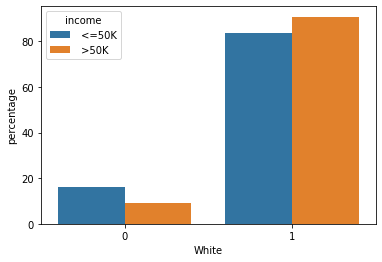

In [37]:
#8.2) La raza importa en el nivel de ingreso?
race_counts = (df_datosAdu.groupby(['income'])['White']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('White'))
p = sns.barplot(x="White", y="percentage", hue="income", data=race_counts)

Los individuos blancos en USA tienen una mayor probabilidad de ganar ingresos superiores a los no blancos, sin embargo la brecha no es sustancial. Requiere mayor investigación (e.g. distribución de ingreso, ingreso medio), sin embargo, a priori, los datos no sugieren una gran discriminación respecto a la raza.

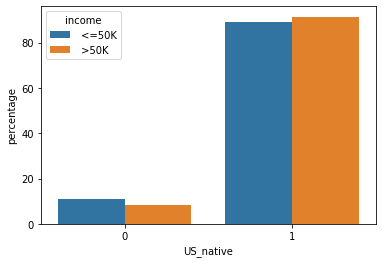

In [41]:
#8.3) Y el pais de origen?
ori_counts = (df_datosAdu.groupby(['income'])['US_native']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('US_native'))
p = sns.barplot(x="US_native", y="percentage", hue="income", data=ori_counts)

Ser procediente de USA incide marginalmente en la probabilidad de percibir ingresos > $50k versus individuos procedentes de otros paises.

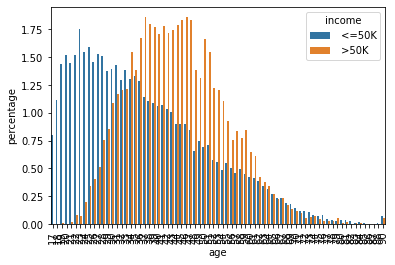

In [50]:
#8.4) Quienes son los grupos de edad que tienden a percibir mayores ingresos?
age_counts = (df_datosAdu.groupby(['income'])['age']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(50)
                     .reset_index()
                     .sort_values('age'))
p = sns.barplot(x="age", y="percentage", hue="income", data=age_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

Los individuos concentrados en la mediana de la población economicamente activa son los que tienen una mayor incidencia en percibir ingresos >$50k anuales.

Es decir: la probabilidad de que un individuo gane >$50k al año tiende a incrementarse desde que ingresa al mercado laboral (i.e. 17-18 años) hasta que alcanza 50-55 años. A partir de alli, los individuos tieden a percibir menos ingresos.

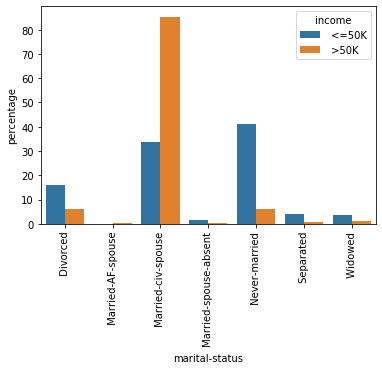

In [49]:
#8.5) Las personas casadas tienden a tener menos ingresos?
mar_counts = (df_datosAdu.groupby(['income'])['marital-status']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('marital-status'))
p = sns.barplot(x="marital-status", y="percentage", hue="income", data=mar_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

En USA, si un individuo está civilmente casado(a), tiene una probabilidad sustancialmente superior de percibir ingresos >$50K anuales que aquellos individuos no casados (e.g. divorciados, separados, viudos) 

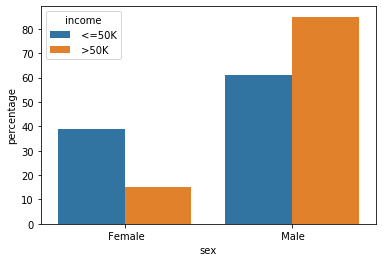

In [46]:
#8.6) Realmente hay dicriminación de género en cuanto al ingreso en USA?
sex_counts = (df_datosAdu.groupby(['income'])['sex']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('sex'))
p = sns.barplot(x="sex", y="percentage", hue="income", data=sex_counts)

Ser de género masculino en USA incrementa notablemente la probablidad de percibir ingresos >$50k anuales versus al género femenino.

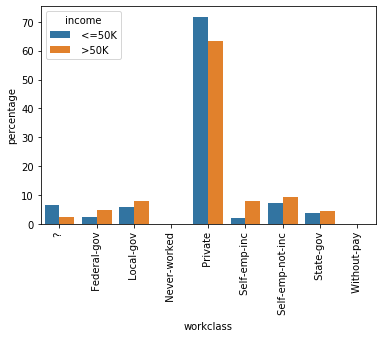

In [48]:
#8.7) Se observa una brecha de ingreso entre trabajadores del Estado vs. privados?
#Y en terminos de autónomos y empleados?
emp_counts = (df_datosAdu.groupby(['income'])['workclass']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('workclass'))
p = sns.barplot(x="workclass", y="percentage", hue="income", data=emp_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

Los empleados públicos (en el agregado) tienen una probabilidad de percibir ingresos >$50k anuales superior a los empleados privados.
Sin embargo, en USA, los individuos autónomos (que, naturalmente, incluye a los dueños del capital, i.e. empresas, negocios) son los que tienen una mayor incidencia de percibir ingresos >$50k anuales.